## EDA for Boston and Chelsea Aerial Images 

### Target classes
- Tree mass
- Large building
- Concrete
- Grass/bushes

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import imageio

import matplotlib.pyplot as plt

!pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

path = ''
image_path = os.path.join(path, '../aerial-data/School_rasters_50m_png/')
image_list = os.listdir(image_path)
image_list = [image_path + i for i in image_list] # create a list of path names for images
name_list = [i.split('/')[-1] for i in image_list] # create a list of school names for images

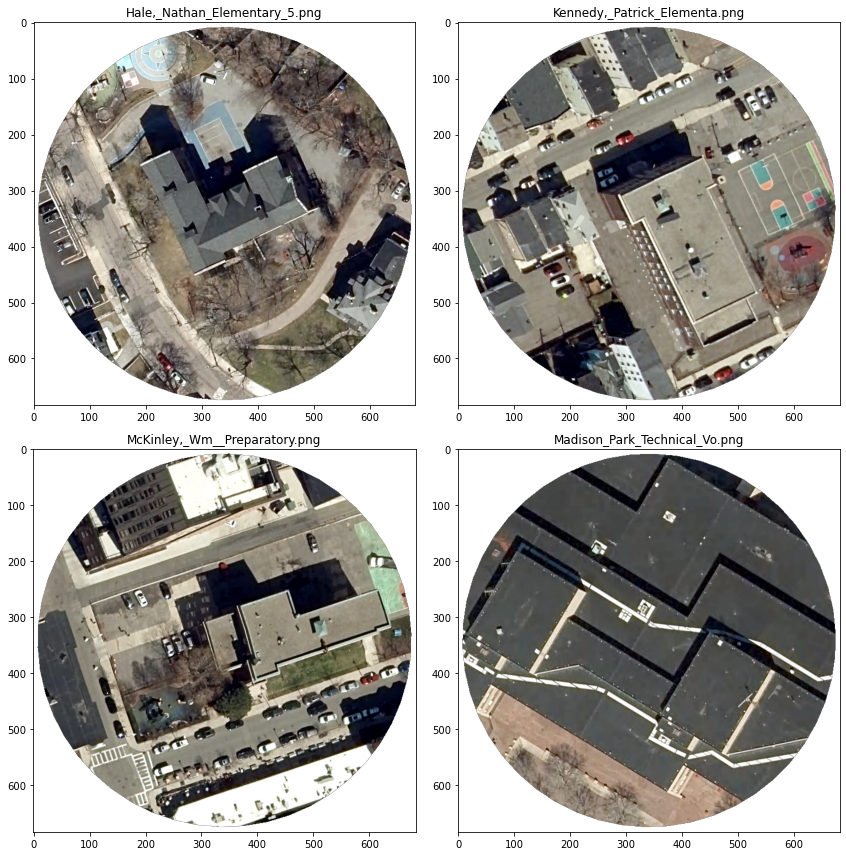

In [2]:
# visualize satelite images
img1 = imageio.imread(image_list[0])
img2 = imageio.imread(image_list[1])
img3 = imageio.imread(image_list[2])
img4 = imageio.imread(image_list[3])
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[1][0].imshow(img3)
ax[1][1].imshow(img4)

ax[0][0].set_title(name_list[0])
ax[0][1].set_title(name_list[1])
ax[1][0].set_title(name_list[2])
ax[1][1].set_title(name_list[3])

plt.tight_layout()

In [3]:
schools_df = pd.read_csv('../aerial-data/School_ID_and_CORDS.csv')
print('The total number of aerial images is {}'.format(len(name_list)))
h,w,c = img1.shape
print('The shape of each image is {} by {} with {} color channels'.format(h, w, c))
schools_df.head()

The total number of aerial images is 134
The shape of each image is 684 by 682 with 4 color channels


,SchoolName,NCESID,Lat,Long
0,Another Course To College,250279000698,42.265168,-71.117736
1,Baldwin Early Learning Center,250279000011,42.342017,-71.140534
2,Beethoven,250279000198,42.263650,-71.155682
3,Blackstone,250279000201,42.340724,-71.071883
4,Boston Adult Academy,250279001511,42.348671,-71.068159


In [6]:
# generate map of schools 
base_map = folium.Map(location=[42.391764, -71.032828]) # coordinates for Chelsea
schools_df[['Lat', 'Long']].apply(lambda row: folium.Marker(location=[row['Lat'], row['Long']], icon=folium.map.Icon(color='green')).add_to(base_map), axis=1)
base_map
